# Worksheet 19

Name: Erwin Pimentel
UID: U97810050

### Topics

- Linear Model Evaluation

## Linear Model Evaluation

Notice that R^2 only increases with the number of explanatory variables used. Hence the need for an adjusted R^2 that penalizes for insignificant explanatory variables.

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))

0.9950561612691431
0.9950564101309851
0.9950667737052843
0.9950918204187138
0.9950957878686817
0.9951014450468864
0.9951116703964433
0.9951268827657788
0.99513420263018
0.9951472328452422
0.9952981035096922
0.9952982782147426
0.9953254568828569
0.99539411733025


a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.31249999999999983
[0, 1, 0, 1, 1]
0.31249999999999983


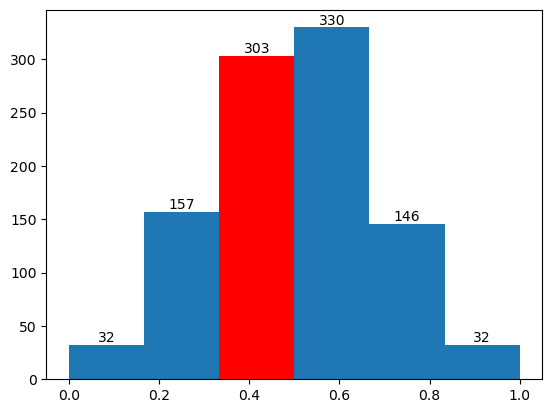

In [10]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

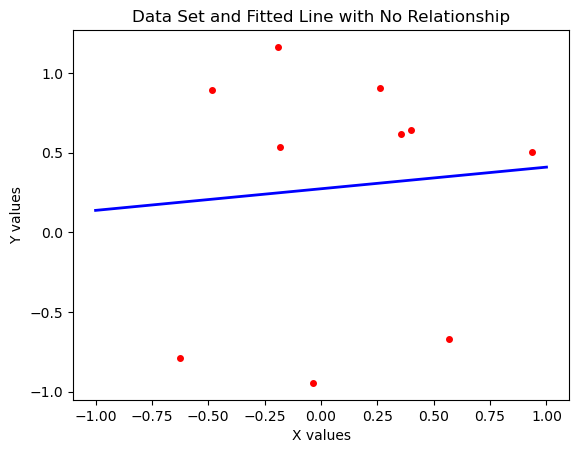

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Sample size for the dataset
SAMPLE_SIZE = 10

# Randomly generate X values
xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE) 
# Generate random y values with no actual relationship to xlin (random noise)
y = np.random.randn(SAMPLE_SIZE)

# Prepare the design matrix with an intercept term (column of ones)
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T

# Perform a simple linear regression (y = beta * x + alpha + error)
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Prepare the values for the estimated line
xplot = np.linspace(-1, 1, 20)
yestplot = beta_hat[0] + beta_hat[1] * xplot

# Plot the original data and the fitted line
plt.plot(xplot, yestplot, 'b-', lw=2)
plt.plot(xlin, y, 'ro', markersize=4)
plt.title('Data Set and Fitted Line with No Relationship')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()


c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

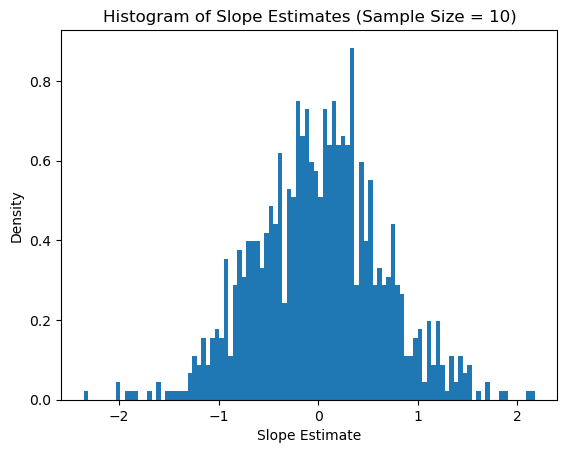

In [13]:
# Initialize an empty list to store the slope estimates
beta_hist = []

# Number of iterations for generating independent datasets
num_iterations = 1000

# Sample size for each dataset
SAMPLE_SIZE = 10

for _ in range(num_iterations):
    # Generate a new dataset with no relationship between X and y
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = np.random.randn(SAMPLE_SIZE)

    # Prepare the design matrix with an intercept term
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T

    # Perform linear regression and store the slope (beta[1])
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    beta_hist.append(beta_hat[1])

# Plotting the histogram of slope estimates
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.set_title('Histogram of Slope Estimates (Sample Size = 10)')
ax.set_xlabel('Slope Estimate')
ax.set_ylabel('Density')
plt.show()


The histogram shows how the estimated slopes are distributed around zero. Given the small sample size (10), there is considerable variability in the estimates. As we increase the sameple size, we expect that with a larger sample size, the estimates will be more consistent and closer to the true value (zero), as larger datasets provide more information and reduce the impact of random noise. 

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

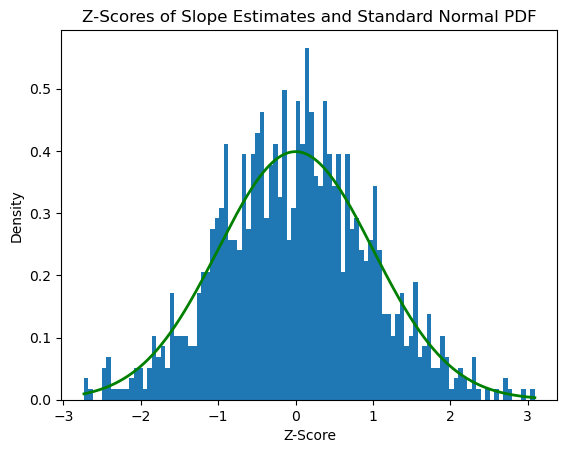

In [14]:
from scipy.stats import norm

# New sample size for each dataset
NEW_SAMPLE_SIZE = 100

# Store the z-scores for the slope estimates
z_scores = []

for _ in range(num_iterations):
    # Generate a new dataset with no relationship between X and y
    xlin = -1.0 + 2.0 * np.random.random(NEW_SAMPLE_SIZE)
    y = np.random.randn(NEW_SAMPLE_SIZE)

    # Prepare the design matrix with an intercept term
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T

    # Estimate beta and the variance-covariance matrix
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    var_covar_matrix = np.linalg.inv(X.T @ X)

    # Calculate the standard error for the slope (k=1 for slope)
    se_slope = np.sqrt(var_covar_matrix[1, 1])
    
    # z-score for the slope estimate
    z_score = (beta_hat[1] - 0) / se_slope
    z_scores.append(z_score)

# Generate the x values for the standard normal pdf
xs = np.linspace(min(z_scores), max(z_scores), 1000)

# Plot the histogram of the z-scores
fig, ax = plt.subplots()
ax.hist(z_scores, bins=100, density=True)

# Plot the standard normal pdf on top
ax.plot(xs, norm.pdf(xs), color='green', lw=2)
ax.set_title('Z-Scores of Slope Estimates and Standard Normal PDF')
ax.set_xlabel('Z-Score')
ax.set_ylabel('Density')

plt.show()


e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

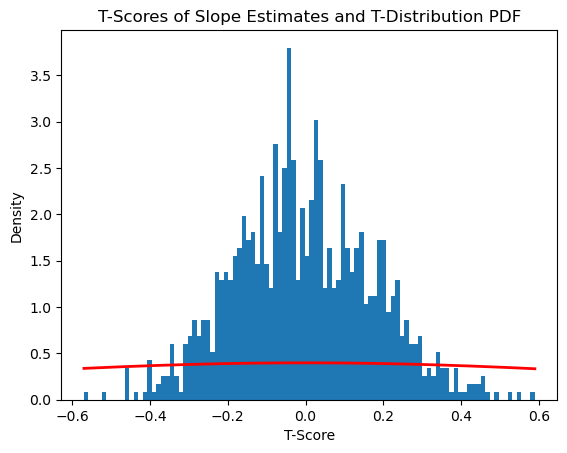

In [15]:
from scipy.stats import t

# Define the function to calculate the standard error
def standard_error(y, y_pred, p):
    # Calculate the Residual Sum of Squares (RSS)
    rss = np.sum((y - y_pred) ** 2)
    # Calculate the standard error
    return np.sqrt(rss / (len(y) - p))

# Store the t-scores for the slope estimates
t_scores = []

# Number of parameters p (intercept and slope)
p = 2

for _ in range(num_iterations):
    # Generate a new dataset with no relationship between X and y
    xlin = -1.0 + 2.0 * np.random.random(NEW_SAMPLE_SIZE)
    y = np.random.randn(NEW_SAMPLE_SIZE)

    # Prepare the design matrix with an intercept term
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T

    # Estimate beta and the variance-covariance matrix
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    y_pred = X @ beta_hat

    # Calculate the standard error for the slope (k=1 for slope)
    se_slope = standard_error(y, y_pred, p)

    # t-score for the slope estimate
    t_score = beta_hat[1] / se_slope
    t_scores.append(t_score)

# Generate the x values for the t-distribution pdf
xs = np.linspace(min(t_scores), max(t_scores), 1000)

# Plot the histogram of the t-scores
fig, ax = plt.subplots()
ax.hist(t_scores, bins=100, density=True)

# Plot the t-distribution pdf on top
ax.plot(xs, t.pdf(xs, NEW_SAMPLE_SIZE - p), color='red', lw=2)
ax.set_title('T-Scores of Slope Estimates and T-Distribution PDF')
ax.set_xlabel('T-Score')
ax.set_ylabel('Density')

plt.show()


f) You are given the following dataset:

[0.50155603 1.19902827]


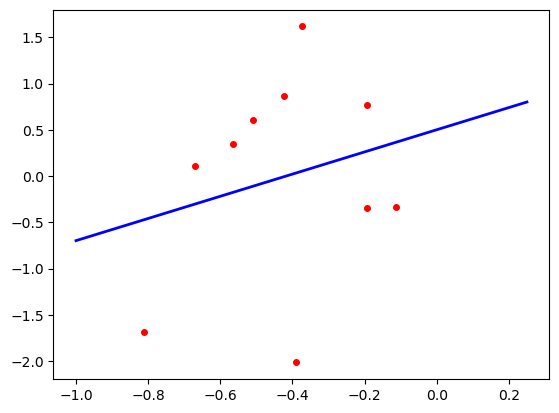

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

xplot = np.linspace(-1,.25,20)
yestplot = beta_hat[0] + beta_hat[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(x, y,'ro',markersize=4)
plt.show()


what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [21]:
# calculate the predicted values and RSS
y_pred = X @ beta_hat
rss = np.sum((y - y_pred) ** 2)

# compute the standard error for the slope (s_beta_hat)
se_slope = np.sqrt((rss / (n - p)) * S[1, 1])

# calculate the t-statistic for the slope
t_statistic = beta_hat[1] / se_slope

# calculate the p-value from the t-distribution
p_value = 2 * (1 - t.cdf(abs(t_statistic), df=n - p))

# Output the re-calculated t-statistic and p-value
t_statistic, p_value

(0.6842586696389723, 0.5131420720905755)

The p-value suggests that there is not a very high or very low probability (51.31%) of observing a t-statistic for the slope at least as extreme as 0.685 under the null hypothesis that the true slope β is zero.